In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import pandas as pd


# Add the project root to the system path using the current working directory
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.models.token import TokenDTO
from src.models.chain import ChainDTO

In [3]:
network = ChainDTO(name="Ethereum", network_id=1)

weth = TokenDTO(
    address="0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2",
    name="Wrapped Ether",
    symbol="WETH",
    decimals=18,
    network=network,
    coingecko_id="weth",
    token_type="collateral_token",
)

### Pool Token A

In [4]:
# get current price 
weth.get_current_price()

2917.84

In [5]:
# get ohlc data from 2020-01-01 to 2024-07-30
weth.get_ohlc_data(start_date='2021-01-01')

In [6]:
# save ohlc data 
weth.save_ohlc_data_to_file(path='../data/ohlc_data')

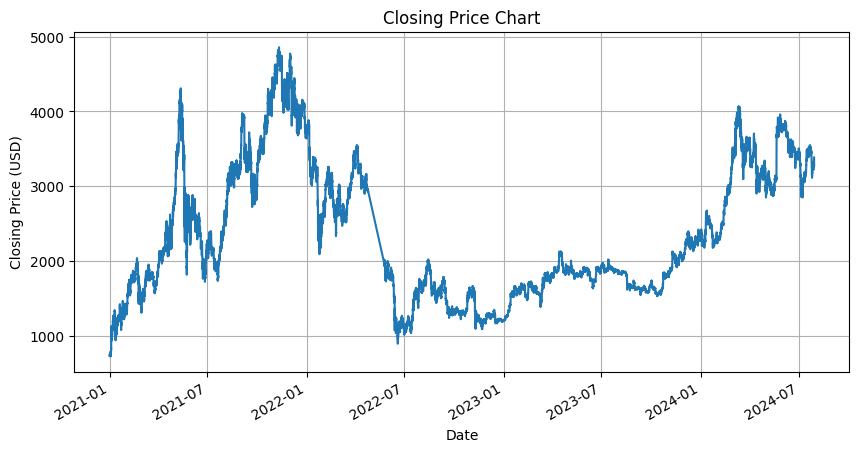

In [7]:
# plot closing prices 
weth.plot_closing_prices()

({'symbol': 'WETH',
  'vol_mean': np.float64(0.649496620457085),
  'vol_median': np.float64(0.5362802624025337),
  'vol_p99': np.float64(2.6275990893752588),
  'vol_max': np.float64(6.940221556991134),
  'rolling_std': np.float64(0.5030900288548809),
  'mu_mean': np.float64(0.4376414343020537),
  'mu_median': np.float64(0.15244746491031516),
  'mu_p05': np.float64(-23.521621859708656),
  'mu_p01': np.float64(-43.597259167580745),
  'mu_min': np.float64(-147.72543497243984),
  'freq': '1h',
  'window': '1D'},
 <Figure size 1000x500 with 1 Axes>)

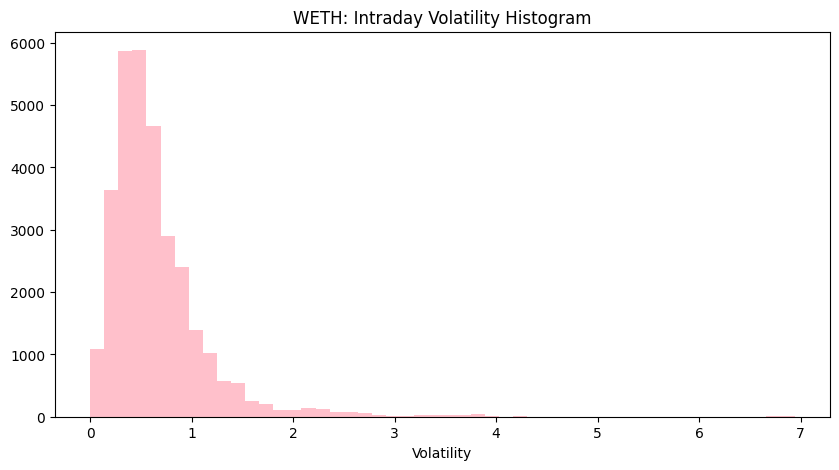

In [8]:
# calc stress volatilties 
weth.calc_stressed_volatilities(plot=True)

### Pool Token B

In [9]:
usdc = TokenDTO(
    address="0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48",
    name="USD Coin",
    symbol="USDC",
    decimals=6,
    network=network,
    coingecko_id="usd-coin",
    token_type="stable_token",
)

In [10]:
usdc.get_current_price()

0.999793

In [11]:
# get ohlc data from 2020-01-01 to 2024-07-30
usdc.get_ohlc_data(start_date='2021-01-01')

In [12]:
# save ohlc data 
usdc.save_ohlc_data_to_file(path='../data/ohlc_data')

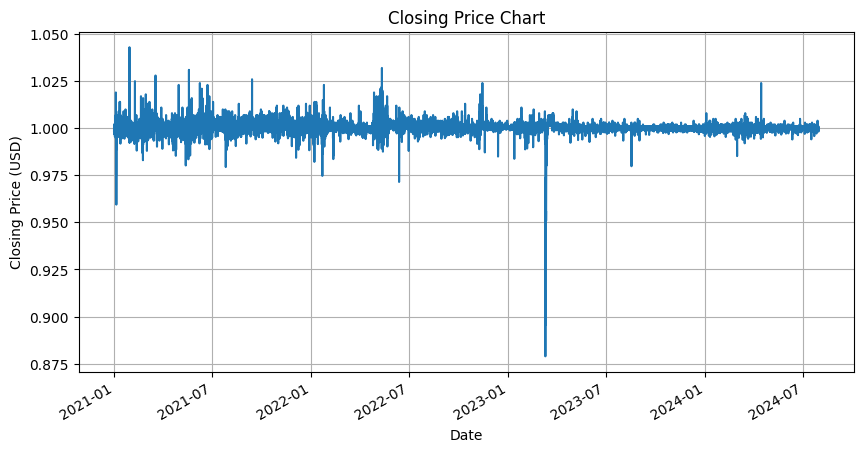

In [13]:
# plot closing prices 
usdc.plot_closing_prices()

### Exchange Token: WETH<>USDC

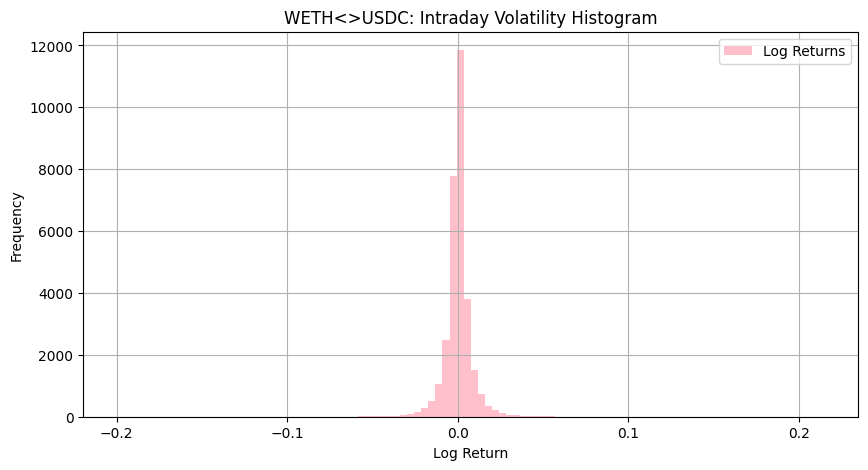

In [216]:
from src.prices.marginal_exchange_rate_generator_v2 import MarginalExchangeRateGenerator

weth_usdc_rate = MarginalExchangeRateGenerator(token_a=weth, token_b=usdc, freq="1h")


In [217]:
# Calculate exchange rate 
weth_usdc_rate.exchange_rate()

,open,high,low,close
timestamp,,,,
2020-12-31 17:00:00,737.045908,741.833771,725.898204,728.383576
2020-12-31 18:00:00,728.061938,740.110000,725.886454,738.250000
2020-12-31 19:00:00,737.370000,740.410000,734.805583,738.932136
2020-12-31 20:00:00,738.205384,742.723212,737.896311,741.851800
2020-12-31 21:00:00,741.555013,744.831095,738.971029,742.547453
...,...,...,...,...
2024-07-29 13:00:00,3375.440070,3390.179942,3369.710290,3373.856144
2024-07-29 14:00:00,3374.784370,3384.669479,3342.977023,3352.162820
2024-07-29 15:00:00,3347.410000,3361.258385,3316.123876,3325.302508


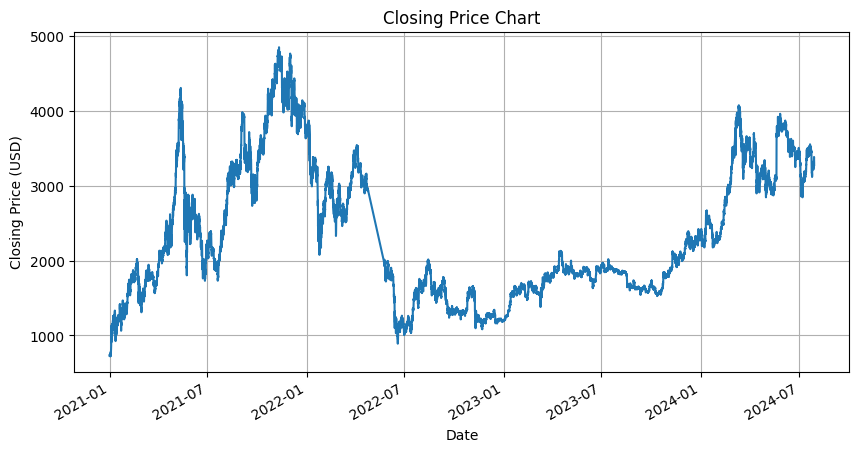

In [218]:
weth_usdc_rate.plot_closing_prices()

In [219]:
print(weth_usdc_rate.theta)
print(weth_usdc_rate.sigma_mu)
print(weth_usdc_rate.sigma)
print(weth_usdc_rate.mu_long_term)
print(weth_usdc_rate.mu_mean)
print(weth_usdc_rate.jump_intensity)
print(weth_usdc_rate.jump_magnitude)

0.04630155950642767
0.0017329493900224923
0.006845871566734096
7.06147712865365e-05
4.979023201759524e-05
0.010017546658159196
0.04823296140091232


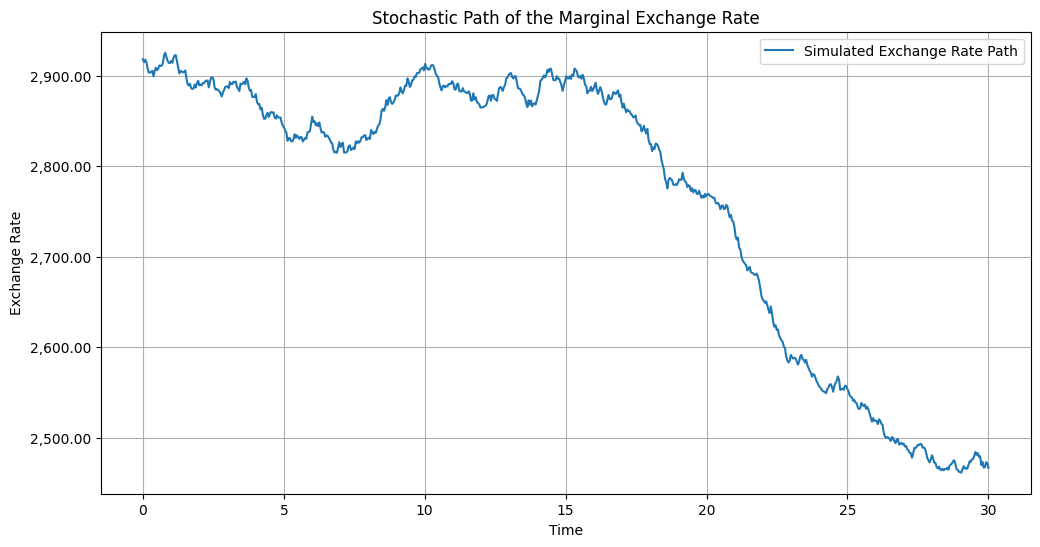

In [220]:
path = weth_usdc_rate.generate_stochastic_path(time_horizon=30, num_steps=30*24, plot=True)


In [221]:
weth_usdc_rate.update_and_resample(target_freq="1min")

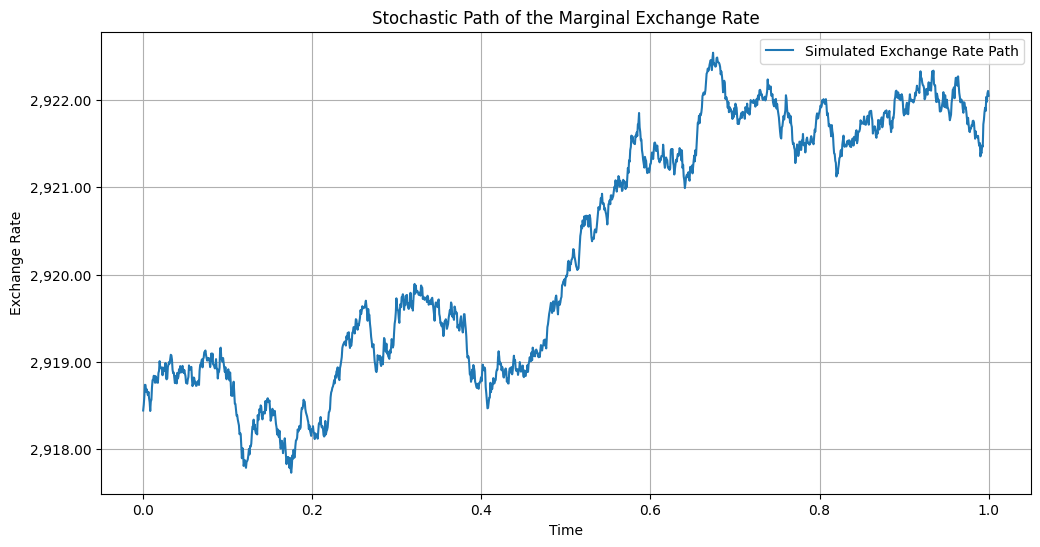

In [229]:
path = weth_usdc_rate.generate_stochastic_path(time_horizon=1, num_steps=24*60, plot=True)



In [230]:
path

array([2918.44411793, 2918.50991765, 2918.60630387, ..., 2922.07239393,
       2922.1005878 , 2922.04609264])